#Import Data

In [ ]:
import gdown
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import pandas as pd
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from tqdm import tqdm


#Load Dataset

In [ ]:
# Ganti dengan ID asli dari file kamu
movie_id = '1Ssbz89-lBhXe8cOLeVLI7Rmp3noZf-Zv'
dataset = '1FwTwHlFEZbzP8wvBPl5iRM7x3-0BsJlP'

url_movie_id = f'https://drive.google.com/uc?id={movie_id}'
url_dataset = f'https://drive.google.com/uc?id={dataset}'

gdown.download(url_movie_id, 'Movie_Id_Titles.csv', quiet=False)
gdown.download(url_dataset, 'Dataset.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Ssbz89-lBhXe8cOLeVLI7Rmp3noZf-Zv
To: /content/Movie_Id_Titles.csv
100%|██████████| 49.3k/49.3k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FwTwHlFEZbzP8wvBPl5iRM7x3-0BsJlP
To: /content/Dataset.csv
100%|██████████| 2.08M/2.08M [00:00<00:00, 47.8MB/s]


'Dataset.csv'

In [ ]:
# Load data
movie_id = pd.read_csv('Movie_Id_Titles.csv')
dataset = pd.read_csv('Dataset.csv')

#Data Understanding

In [ ]:
movie_id.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
dataset.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
dataset.info()
movie_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


#Data Preparation

In [ ]:
merged_df = dataset.merge(movie_id, on='item_id')
merged_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [ ]:
merged_df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [ ]:
print(merged_df.shape)
print(merged_df.info())
print(merged_df.isnull().sum())


(100003, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB
None
user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64


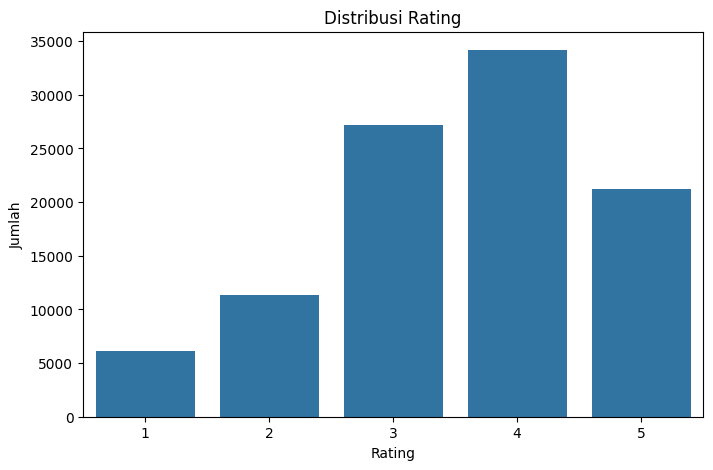

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=merged_df)
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()


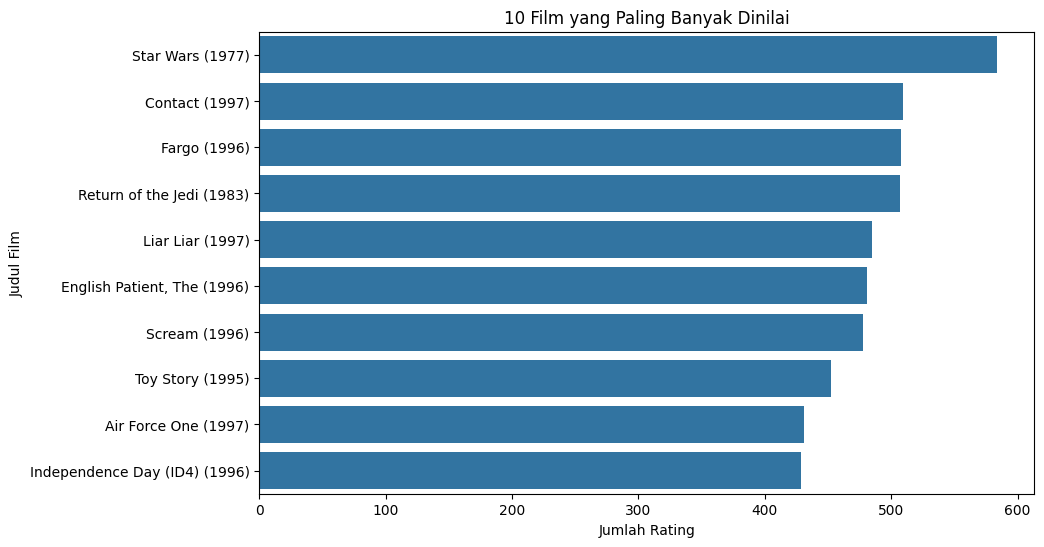

In [ ]:
top_rated_count = merged_df['title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rated_count.values, y=top_rated_count.index)
plt.title("10 Film yang Paling Banyak Dinilai")
plt.xlabel("Jumlah Rating")
plt.ylabel("Judul Film")
plt.show()


In [ ]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. Split data
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

#Modeling

In [ ]:
# Filter user & movie aktif
min_ratings_user = 10
min_ratings_movie = 10

active_users = train_df['user_id'].value_counts()
active_users = active_users[active_users >= min_ratings_user].index
train_df = train_df[train_df['user_id'].isin(active_users)]

popular_movies = train_df['title'].value_counts()
popular_movies = popular_movies[popular_movies >= min_ratings_movie].index
train_df = train_df[train_df['title'].isin(popular_movies)]


In [ ]:
#Buat user-movie matrix
user_movie_matrix = train_df.pivot_table(index='user_id', columns='title', values='rating')

In [ ]:
#Fungsi rekomendasi
def recommend_movies_for_user(user_id, user_movie_matrix, train_df, n_recommendations=10):
    if user_id not in user_movie_matrix.index:
        return pd.DataFrame()  # Cold-start user

    user_ratings = user_movie_matrix.loc[user_id]
    similar_scores = pd.Series(dtype='float64')

    for movie, rating in user_ratings.dropna().items():
        if user_movie_matrix[movie].count() < 2 or user_movie_matrix[movie].std() == 0:
            continue

        sim_movies = user_movie_matrix.corrwith(user_movie_matrix[movie])
        sim_movies = sim_movies.dropna()
        sim_movies = sim_movies * (rating - user_ratings.mean())  # normalisasi

        similar_scores = similar_scores.add(sim_movies, fill_value=0)

    recommendations = pd.DataFrame(similar_scores, columns=["score"])

    # Gabungkan dengan rating count
    rating_counts = train_df.groupby("title")["rating"].count()
    recommendations["rating_count"] = recommendations.index.map(rating_counts)

    # Buang film yang sudah ditonton user
    watched_movies = train_df[train_df['user_id'] == user_id]['title'].tolist()
    recommendations = recommendations[~recommendations.index.isin(watched_movies)]

    # Filter minimum rating_count
    recommendations = recommendations[recommendations["rating_count"] >= 2]

    # Skor akhir berbobot
    recommendations["final_score"] = recommendations["score"] * np.log1p(recommendations["rating_count"])

    # Urutkan berdasarkan final_score
    recommendations = recommendations.sort_values("final_score", ascending=False)

    return recommendations.head(n_recommendations)


#evaluation

In [ ]:

# Evaluasi
def evaluate_recommender(test_df, train_df, user_movie_matrix, k=10, min_rating=4.0):
    precisions, recalls, f1s = [], [], []
    user_ids = test_df['user_id'].unique()

    for user_id in tqdm(user_ids, desc="Evaluating"):
        actual = test_df[(test_df['user_id'] == user_id) & (test_df['rating'] >= min_rating)]['title'].tolist()
        if not actual:
            continue

        recommended_df = recommend_movies_for_user(user_id, user_movie_matrix, train_df, n_recommendations=k)
        if recommended_df.empty:
            continue

        recommended_titles = recommended_df.index.tolist()

        tp = len(set(actual) & set(recommended_titles))
        precision = tp / k if k > 0 else 0
        recall = tp / len(actual) if len(actual) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    avg_f1 = sum(f1s) / len(f1s) if f1s else 0

    print(f"\nHasil Evaluasi Sistem Rekomendasi:")
    print(f"Precision@{k}: {avg_precision:.4f}")
    print(f"Recall@{k}   : {avg_recall:.4f}")
    print(f"F1-Score@{k} : {avg_f1:.4f}")

    return avg_precision, avg_recall, avg_f1

# Sampling subset user dari test set
sampled_users = np.random.choice(test_df['user_id'].unique(), size=100, replace=False)
sampled_test_df = test_df[test_df['user_id'].isin(sampled_users)]

# Jalankan evaluasi
evaluate_recommender(sampled_test_df, train_df, user_movie_matrix, k=20, min_rating=3.5)


Evaluating: 100%|██████████| 100/100 [30:40<00:00, 18.41s/it]


Hasil Evaluasi Sistem Rekomendasi:
Precision@20: 0.0281
Recall@20   : 0.0270
F1-Score@20 : 0.0245


(0.0280612244897959, 0.027005739635185884, 0.024506216024894466)